<a href="https://colab.research.google.com/github/rewqeas/carpredictionWithML/blob/main/carprediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [165]:
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
from tensorflow.keras.layers import Normalization,Dense,InputLayer
from tensorflow.keras.losses import MeanSquaredError, MeanAbsoluteError, Huber
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

DATA PREPARATION

In [166]:
data = pd.read_csv("train.csv")



In [167]:
data.head(5)

,v.id,on road old,on road now,years,km,rating,condition,economy,top speed,hp,torque,current price
0,1,535651,798186,3,78945,1,2,14,177,73,123,351318.0
1,2,591911,861056,6,117220,5,9,9,148,74,95,285001.5
2,3,686990,770762,2,132538,2,8,15,181,53,97,215386.0
3,4,573999,722381,4,101065,4,3,11,197,54,116,244295.5
4,5,691388,811335,6,61559,3,9,12,160,53,105,531114.5


In [168]:
#ploting the data
#sns.pairplot(data[['years',	'km',	'rating',	'condition',	'economy','top speed',	'hp',	'torque',	'current price']],diag_kind = 'kde')

In [169]:
#
tensor_data = tf.constant(data)
tensor_data = tf.cast(tensor_data,tf.float32)
print(tensor_data[994:])

tf.Tensor(
[[9.950000e+02 6.754580e+05 7.136500e+05 5.000000e+00 1.497290e+05
  3.000000e+00 6.000000e+00 1.000000e+01 1.540000e+02 7.700000e+01
  1.220000e+02 9.831150e+04]
 [9.960000e+02 6.332380e+05 7.438500e+05 5.000000e+00 1.250920e+05
  1.000000e+00 6.000000e+00 1.100000e+01 1.710000e+02 9.500000e+01
  9.700000e+01 1.907440e+05]
 [9.970000e+02 5.996260e+05 8.481950e+05 4.000000e+00 8.337000e+04
  2.000000e+00 9.000000e+00 1.400000e+01 1.610000e+02 1.010000e+02
  1.200000e+02 4.197480e+05]
 [9.980000e+02 6.463440e+05 8.427330e+05 7.000000e+00 8.672200e+04
  1.000000e+00 8.000000e+00 9.000000e+00 1.960000e+02 1.130000e+02
  8.900000e+01 4.058710e+05]
 [9.990000e+02 5.355590e+05 7.324390e+05 2.000000e+00 1.404780e+05
  4.000000e+00 5.000000e+00 9.000000e+00 1.840000e+02 1.120000e+02
  1.280000e+02 7.439800e+04]
 [1.000000e+03 5.901050e+05 7.797430e+05 5.000000e+00 6.729500e+04
  4.000000e+00 2.000000e+00 8.000000e+00 1.990000e+02 9.900000e+01
  9.600000e+01 4.149385e+05]], shape=(6,

In [170]:
#random shuffling the sample for unbias data
tensor_data = tf.random.shuffle(tensor_data)
print(tensor_data)

tf.Tensor(
[[1.040000e+02 6.076020e+05 8.580630e+05 ... 5.300000e+01 7.100000e+01
  3.497620e+05]
 [1.290000e+02 5.295150e+05 7.292340e+05 ... 9.200000e+01 7.300000e+01
  3.309085e+05]
 [4.230000e+02 5.847860e+05 8.968390e+05 ... 1.050000e+02 1.280000e+02
  4.271325e+05]
 ...
 [1.080000e+02 6.840180e+05 7.382980e+05 ... 5.800000e+01 7.200000e+01
  1.987380e+05]
 [8.580000e+02 5.777910e+05 7.555980e+05 ... 7.000000e+01 1.310000e+02
  1.139420e+05]
 [4.850000e+02 5.323170e+05 7.452230e+05 ... 9.500000e+01 7.900000e+01
  1.267915e+05]], shape=(1000, 12), dtype=float32)


In [171]:
#taking input rows
X = tensor_data[:,3:-1]
print(X)




tf.Tensor(
[[4.00000e+00 9.62060e+04 5.00000e+00 ... 1.94000e+02 5.30000e+01
  7.10000e+01]
 [5.00000e+00 7.43200e+04 2.00000e+00 ... 1.44000e+02 9.20000e+01
  7.30000e+01]
 [6.00000e+00 8.49330e+04 3.00000e+00 ... 1.59000e+02 1.05000e+02
  1.28000e+02]
 ...
 [3.00000e+00 1.30238e+05 1.00000e+00 ... 2.00000e+02 5.80000e+01
  7.20000e+01]
 [6.00000e+00 1.37347e+05 3.00000e+00 ... 1.64000e+02 7.00000e+01
  1.31000e+02]
 [3.00000e+00 1.32129e+05 2.00000e+00 ... 2.00000e+02 9.50000e+01
  7.90000e+01]], shape=(1000, 8), dtype=float32)


In [172]:
#taking input column
y = tensor_data[:,-1]
y = tf.expand_dims(y,axis=1)
print(y[0:5])




tf.Tensor(
[[349762. ]
 [330908.5]
 [427132.5]
 [362434.5]
 [356606.5]], shape=(5, 1), dtype=float32)


In [173]:
#Giving the ratio for training, testing and validation
TRAIN_RATIO = 0.8
VAL_RATIO = 0.1
TEST_RATIO = 0.1

DATASET_SIZE = len(X)

In [174]:
X_train = X[:int(TRAIN_RATIO*DATASET_SIZE)]
y_train = y[:int(TRAIN_RATIO*DATASET_SIZE)]
print(X_train.shape)
print(y_train.shape)

(800, 8)
(800, 1)


In [175]:
#if the dataset is bigger, we select 1/100 // 1/1k or the size to train. reason:to make the training more faster
train_dataset = tf.data.Dataset.from_tensor_slices((X_train,y_train))

train_dataset = train_dataset.shuffle(buffer_size = 8, reshuffle_each_iteration = True).batch(32).prefetch(tf.data.AUTOTUNE)


In [176]:
X_val = X[int(TRAIN_RATIO*DATASET_SIZE):int((TRAIN_RATIO+VAL_RATIO)*DATASET_SIZE)]
y_val = y[int(TRAIN_RATIO*DATASET_SIZE):int((TRAIN_RATIO+VAL_RATIO)*DATASET_SIZE)]
print(X_val.shape)
print(y_val.shape)

(100, 8)
(100, 1)


In [177]:
val_dataset = tf.data.Dataset.from_tensor_slices((X_val,y_val))

val_dataset = val_dataset.shuffle(buffer_size = 8, reshuffle_each_iteration = True).batch(32).prefetch(tf.data.AUTOTUNE)


In [178]:
X_test = X[int((TRAIN_RATIO+VAL_RATIO)*DATASET_SIZE):]
y_test = y[int((TRAIN_RATIO+VAL_RATIO)*DATASET_SIZE):]
print(X_test.shape)
print(y_test.shape)

(100, 8)
(100, 1)


In [179]:
test_dataset = tf.data.Dataset.from_tensor_slices((X_test,y_test))

test_dataset = test_dataset.shuffle(buffer_size = 8, reshuffle_each_iteration = True).batch(32).prefetch(tf.data.AUTOTUNE)


In [180]:
normalizer = Normalization()
normalizer.adapt(X_train)
normalizer(X)

<tf.Tensor: shape=(1000, 8), dtype=float32, numpy=
array([[-0.32321358, -0.14184713,  1.4399486 , ...,  1.431803  ,
        -1.5493431 , -1.5419956 ],
       [ 0.25784445, -0.8927811 , -0.6763261 , ..., -1.1799034 ,
         0.34952572, -1.4467666 ],
       [ 0.8389025 , -0.52863675,  0.02909877, ..., -0.39639148,
         0.98248196,  1.1720308 ],
       ...,
       [-0.9042716 ,  1.02583   , -1.3817511 , ...,  1.7452078 ,
        -1.3058984 , -1.4943811 ],
       [ 0.8389025 ,  1.2697481 ,  0.02909877, ..., -0.13522084,
        -0.72163105,  1.3148743 ],
       [-0.9042716 ,  1.0907124 , -0.6763261 , ...,  1.7452078 ,
         0.49559253, -1.1610796 ]], dtype=float32)>

In [181]:
#model creation sequential
model = tf.keras.Sequential([InputLayer(input_shape=(8,)),
                             normalizer,
                             Dense(128,activation='relu'),
                             Dense(128,activation='relu'),
                             Dense(128,activation='relu'),
                             Dense(1)
                            ])
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ normalization_6 (Normalization) │ (None, 8)              │            17 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_34 (Dense)                │ (None, 128)            │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_35 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_36 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_37 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 34,322 (134.07 KB)

 Trainable params: 34,305 (134.00 KB)

 Non-trainable params: 17 (72.00 B)

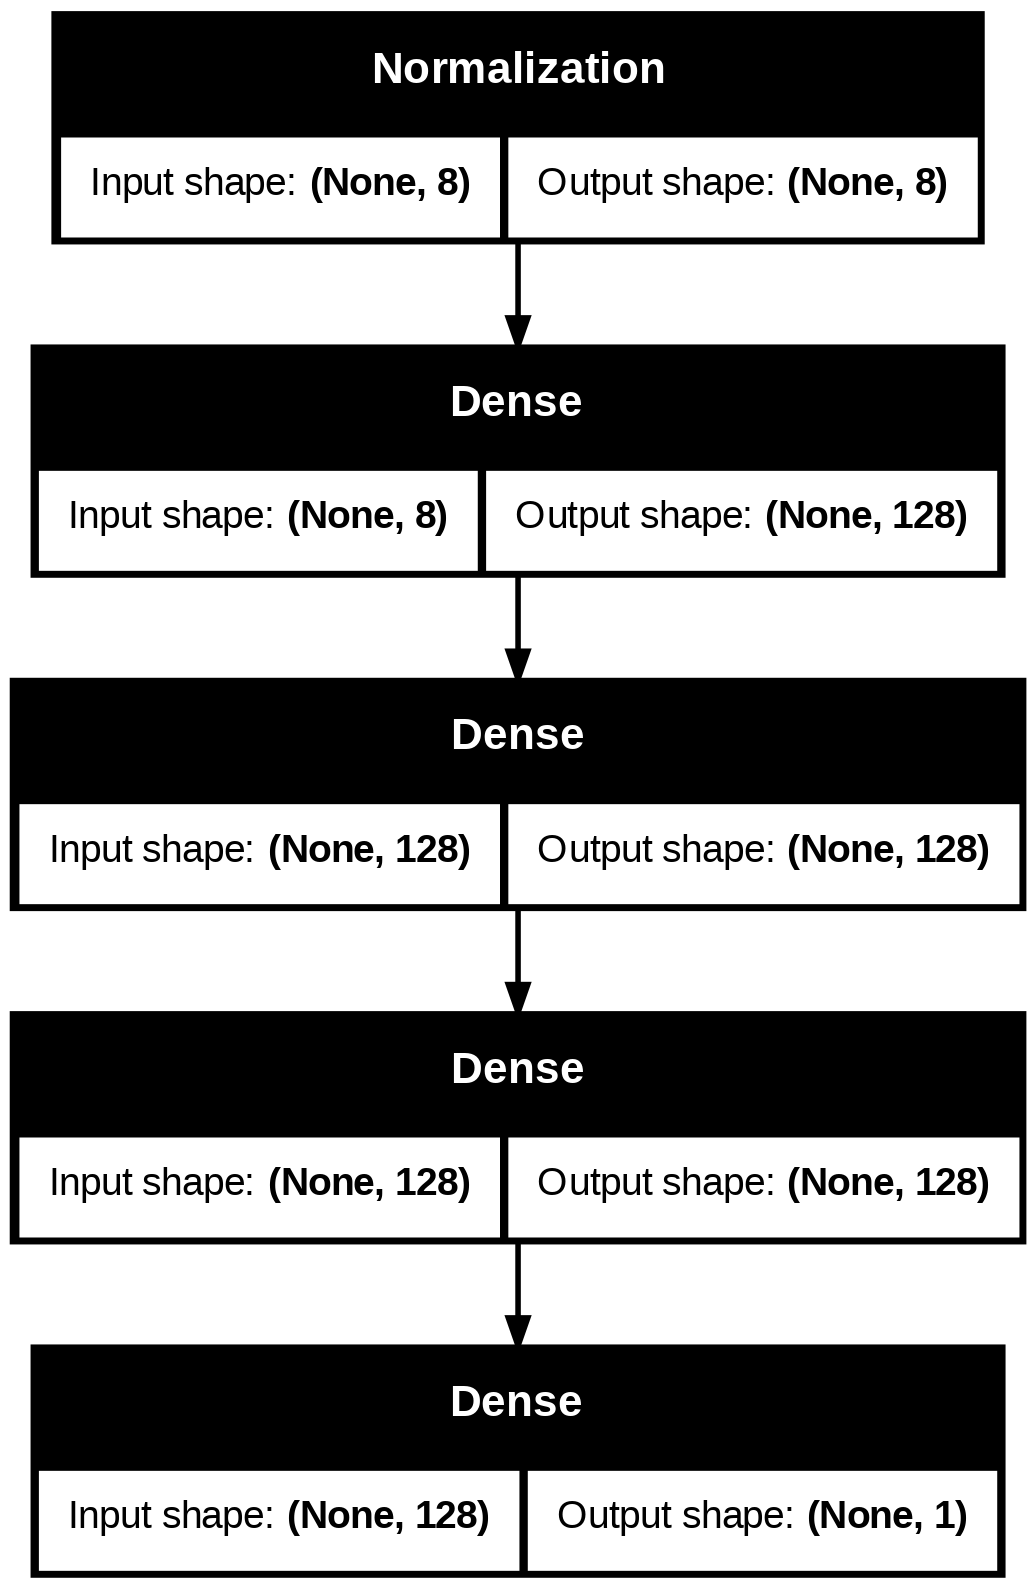

In [182]:
#plot model of the given model
tf.keras.utils.plot_model(model, to_file="model.png", show_shapes=True)

In [183]:
model.compile(optimizer=Adam(), loss=MeanAbsoluteError(), metrics = [RootMeanSquaredError()])

In [184]:
history = model.fit(train_dataset,validation_data = val_dataset,epochs=100,verbose=1)

Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 302978.5625 - root_mean_squared_error: 326682.4062 - val_loss: 296096.9375 - val_root_mean_squared_error: 318708.0938
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 303094.9375 - root_mean_squared_error: 326796.0312 - val_loss: 296012.3125 - val_root_mean_squared_error: 318628.9688
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 302805.1250 - root_mean_squared_error: 326512.0625 - val_loss: 295643.6250 - val_root_mean_squared_error: 318284.9062
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 302277.0312 - root_mean_squared_error: 326038.6562 - val_loss: 294507.8750 - val_root_mean_squared_error: 317226.6250
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 301143.3125 - root_mean_squared_error: 324829.2500 - val_loss: 291746.2500 - val_root_mean_squared_error: 314657.2812
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 297709.7500 - root_mean_squared_error: 321910.7188 - va

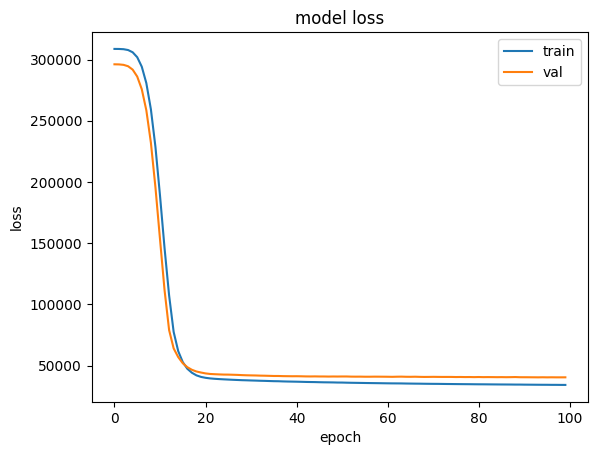

In [185]:
#ploting the loss from the model
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','val'], loc='upper right')
plt.show()


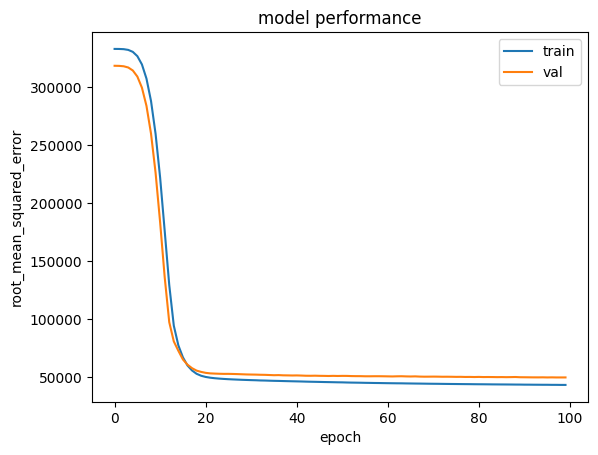

In [186]:
#ploting the root mean square loss
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title('model performance')
plt.ylabel('root_mean_squared_error')
plt.xlabel('epoch')
plt.legend(['train','val'])

plt.show()

In [187]:
model.evaluate(test_dataset)
y_pred = list(model.predict(X_test)[:,0])
#print(y_pred)



4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 33902.0352 - root_mean_squared_error: 40489.3438 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


In [188]:
y_test[1]

<tf.Tensor: shape=(1,), dtype=float32, numpy=array([427079.], dtype=float32)>

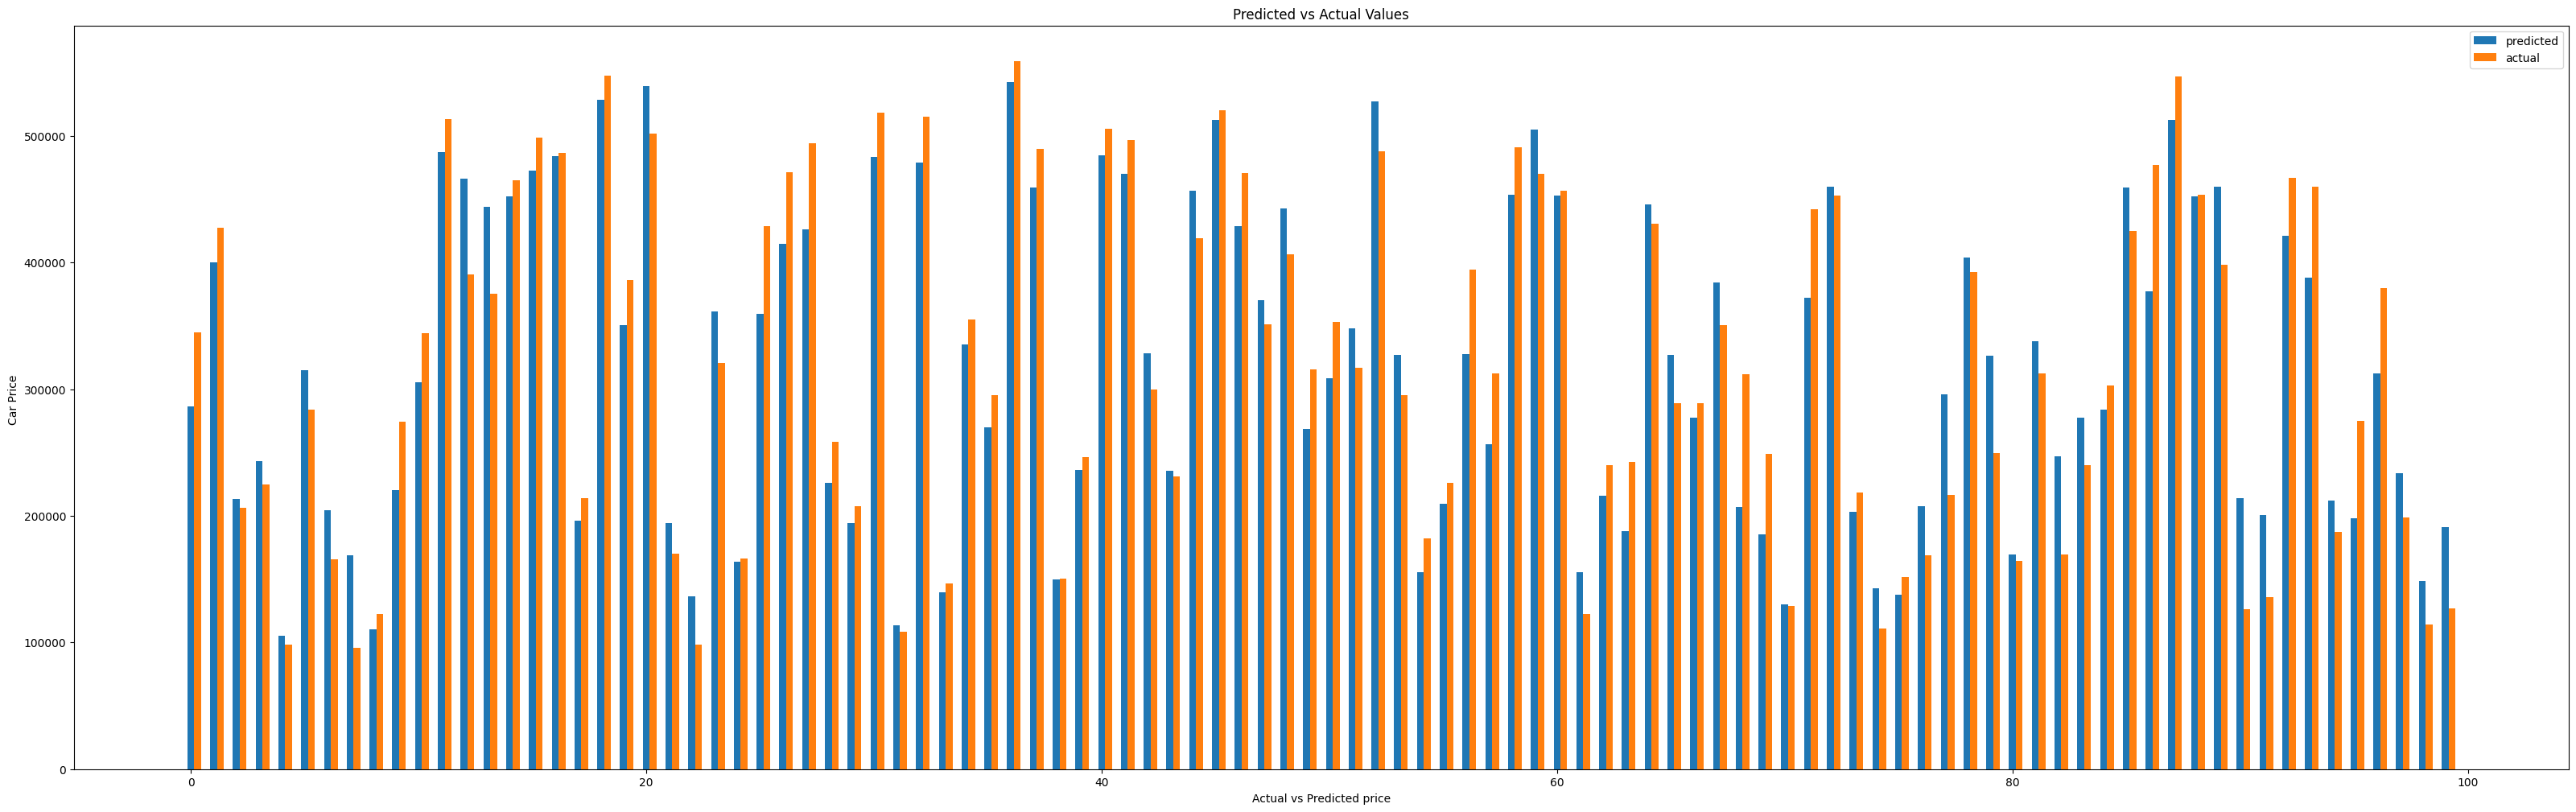

In [189]:
#predicted and actual value bar chart
ind = np.arange(100)
plt.figure(figsize=(40,12))

#bar chart doesn't accept 2D array


y_true = list(y_test[:,0])
width = 0.3


plt.bar(ind, y_pred, width, label='Predicted')
plt.bar(ind + width, y_true, width, label='Actual')

plt.xlabel('Actual vs Predicted price')
plt.ylabel('Car Price ')
plt.title('Predicted vs Actual Values')
plt.legend(['predicted','actual'])
plt.show()